**PROYECT 1**

In this proyect three questions must be raised from the dataset and they must be answered. This Jupyter Notebook comes with a README file an a blog post

**IMPORT DATESETS AND LIBRARIES**

In [1]:
#import libraries and datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from IPython import display
%matplotlib inline


df = pd.read_csv('C:/Users/Administrador/Desktop/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
schema = pd.read_csv('C:/Users/Administrador/Desktop/survey_results_schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


**DATA UNDERSTANDING** 

It is important to undestand the data before raising and answering questions

In [3]:
num_rows = df.shape[0] #number of rows
num_rows

51392

In [4]:
num_cols = df.shape[1] #number of columns
num_cols

154

In [5]:
df.describe() # float type variables description

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


**BUSINESS UNDERSTANDING**
Based on the available data we ask ouselfs the following question:

Question 1: Not having any type of formal education affects a person's job satisfaction and salary?

Question 2: How does hours worked and salary affect a person's job satisfaction?

Question 3: People that live in the US, UK and Colombia earn a diferent salaries even when we control by gender and by hours worked?

**PREGUNTA 1:** 

No tener ningún tipo de educación formal afecta la satisfacción laboral y el salario de una persona?

**QUESTION 1:**

Not having any type of formal education affects a person's job satisfaction and  salary?

In [6]:
df['JobSatisfaction'].isnull().mean()

0.21435242839352428

In [7]:
df['Salary'].isnull().mean()

0.7491632938978829

In [8]:
df.groupby(['FormalEducation']).mean()['JobSatisfaction'].sort_values()

FormalEducation
I never completed any formal education                               6.833333
Bachelor's degree                                                    6.866363
Master's degree                                                      6.953151
Primary/elementary school                                            6.956897
I prefer not to answer                                               7.005682
Some college/university study without earning a bachelor's degree    7.081334
Professional degree                                                  7.087459
Secondary school                                                     7.143082
Doctoral degree                                                      7.348857
Name: JobSatisfaction, dtype: float64

In [9]:
df.groupby(['FormalEducation']).mean()['Salary'].sort_values()

FormalEducation
I prefer not to answer                                               38284.836141
Professional degree                                                  39503.658863
Secondary school                                                     40395.148419
I never completed any formal education                               44430.660621
Some college/university study without earning a bachelor's degree    55912.810459
Bachelor's degree                                                    56914.358553
Master's degree                                                      58250.838766
Primary/elementary school                                            62677.337356
Doctoral degree                                                      78527.933053
Name: Salary, dtype: float64

**PREGUNTA 2:**

Cómo afectan las horas trabajadas y el salario la satisfacción laboral de una persona?

**QUESTION 2:** 

How does hours worked and salary affect a person's job satisfaction?

**DATA ANALYSIS**

First we take a look at some characteristics of numeric variables in the dataset

Histograms can help us undestand how do variables behave

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241388FFA08>,
      dtype=object)

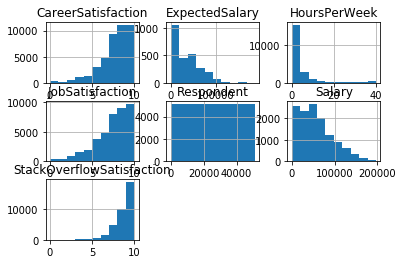

In [10]:
df.hist()

A correlation matrix can help us understand the relationship between two or more variables in the dataset

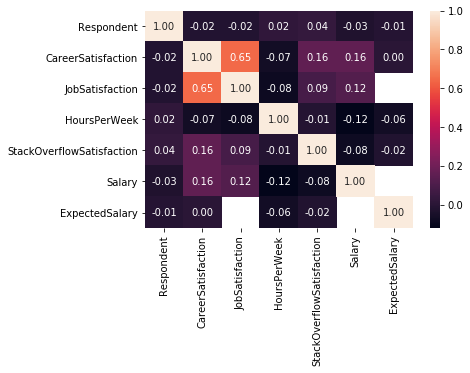

In [11]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

**PREPARING DATA**

In this step is necessary to prepare and fix data before the actual modelling. We need three variables to answer the question: JobSatisfaction, HoursPerWeek and Salary. For salary and job satisfaction we will drop the observations with no information, meanwhile we will fill the blank spaces with the mean for the HoursPerWeek variable. 

In [12]:
# Variables a usar
variables = df[['JobSatisfaction', 'HoursPerWeek', 'Salary']]
variables = variables.dropna(subset=['Salary', 'JobSatisfaction' ], axis=0)

# Arreglar numéricas
numericas = variables.select_dtypes(include=['float', 'int']).columns
for col in numericas:
    variables[col].fillna((variables[col].mean()), inplace=True)
        


**DATA MODELLING AND RESULTS**

After preparing the data wwe are ready for modelling. In this case we will use a linear regression model after dividing the dataset into a train and a test dataset. After modelling we will loo at the results and interprete them

In [13]:
# Crear matrices
y = variables[['JobSatisfaction']]   
X = variables[['HoursPerWeek', 'Salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=123)

modelo = LinearRegression(normalize=True) 

modelo.fit(X_train, y_train) 

y_test_preds = modelo.predict(X_test) 


var = X_train.columns
coeficientes = modelo.coef_
intercepto = modelo.intercept_

print(intercepto, var, coeficientes, sep='\n')

[6.74445069]
Index(['HoursPerWeek', 'Salary'], dtype='object')
[[-4.07532990e-02  5.98346389e-06]]


**PREGUNTA 3:**

Las personas que viven en Estados Unidos, En Reino Unido, y en Colombia ganan un salario diferente controlando por su genero y por las horas trabajadas?

**QUESTION 3:** 

People that live in the US, UK and Colombia earn a diferent salaries even when we control by gender and by hours worked?

**PREPARING DATA**

In this step is necessary to prepare and fix data before the actual modelling. We need four variables to answer the question: Country, Gender, HoursPerWeek and Salary. For salary, gender and country we will drop the observations with no information, meanwhile we will fill the blank spaces with the mean for the HoursPerWeek variable. 

In [14]:
# Variables a usar
variables = df[['Salary', 'HoursPerWeek','Country', 'Gender']]
variables = variables.dropna(subset=['Salary','Country', 'Gender'], axis=0)
y = variables[['Salary']]   
variables = variables[['HoursPerWeek','Country', 'Gender']]

# Arreglar numéricas
numericas = variables.select_dtypes(include=['float', 'int']).columns
for col in numericas:
    variables[col].fillna((variables[col].mean()), inplace=True)


**PREPARING CATEGORICAL VARIABLES**

For the categorical variables we create boolean variables for each of the posible categories and choose the appropriate ones to answer the question

In [15]:
# Arreglar categóricas    
categoricas = variables.select_dtypes(include=['object']).copy().columns
for var in  categoricas:
       variables = pd.concat([variables.drop(var, axis=1), pd.get_dummies(variables[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        

**DATA MODELLING AND RESULTS**

After preparing the data wwe are ready for modelling. In this case we will use a linear regression model after dividing the dataset into a train and a test dataset. After modelling we will loo at the results and interprete them

In [16]:
# Crear matrices
X = variables[['HoursPerWeek','Country_United States','Country_United Kingdom', 'Country_Colombia', 'Gender_Male']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=123)

modelo2 = LinearRegression(normalize=True) 

modelo2.fit(X_train, y_train) 

y_test_preds = modelo2.predict(X_test) 


var = X_train.columns
coeficientes = modelo2.coef_
intercepto = modelo2.intercept_

print('Interceto:',intercepto,'' ,'Variables:', var,'' ,'Pesos:', coeficientes, sep='\n')

Interceto:
[35003.91577279]

Variables:
Index(['HoursPerWeek', 'Country_United States', 'Country_United Kingdom',
       'Country_Colombia', 'Gender_Male'],
      dtype='object')

Pesos:
[[  -554.05365709  58067.90040038  13817.56257984 -20934.88944526
    4959.4156875 ]]
